In [4]:
import pandas as pd
import pickle
import numpy as np

In [2]:
with open("filtered_word_lists.pkl", "rb") as f:
    data = pickle.load(f)

# Access the lists
complaint_words = data["complaint_words_filtered"]
neutral_words = data["neutral_words"]

In [5]:
import gensim.downloader as api

# Load GloVe model
glove = api.load("glove-wiki-gigaword-100")  # or 50/200/300

# Filter to words in your list
word_vecs = []
filtered_words = []
for word in complaint_words:
    if word in glove:
        word_vecs.append(glove[word])
        filtered_words.append(word)
word_vecs = np.array(word_vecs)

In [23]:
from sklearn.cluster import KMeans
import numpy as np

n_clusters = 40  # or based on elbow method

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(word_vecs)

# Group words by cluster
from collections import defaultdict
clusters = defaultdict(list)
for word, label in zip(complaint_words, labels):
    clusters[label].append(word)

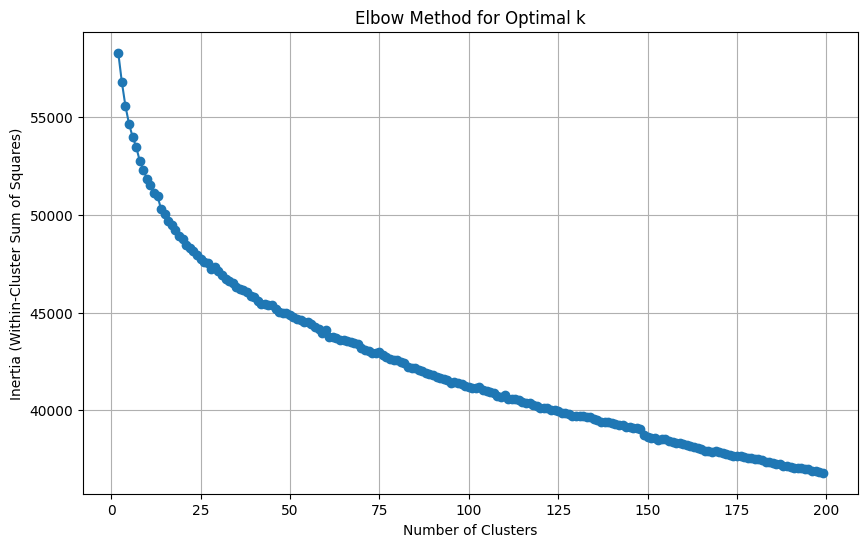

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from collections import defaultdict

# 1. Determine optimal number of clusters using elbow method
inertias = []
cluster_range = range(2, 200)  # Try between 2 and 40 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(word_vecs)
    inertias.append(kmeans.inertia_)

# 2. Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertias, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()


In [24]:
for cluster_id, words in clusters.items():
    print(f"\nCluster {cluster_id} ({len(words)} words):")
    print(", ".join(words))



Cluster 31 (38 words):
toxic, waste, contain, burn, fume, bleeding, wet, low, advised, slight, replacement, pick, neck, rushed, yank, cage, excessively, joint, pic, horrify, potentially, checkup, uncomfortable, skid, wedged, discoverd, meeting, inhailed, carcinogen, cracking, complacency, internally, whimpering, amaya, noose, splatter, ophthamologist, issticking

Cluster 10 (88 words):
dangerous, hazard, danger, avoid, warning, rash, occur, cause, severe, follow, per, asked, notice, okay, pubic, reason, fragment, shake, chiliscented, smash, deal, batch, harness, suddenly, trip, horrible, case, ought, backwards, currently, freak, thrift, breakage, shoulder, attorney, hauck, attachment, continuously, reccomded, acceleration, upset, involve, hear, tight, moderno, confuse, grabbed, maneuver, vinyl, kept, decal, knife, barb, boom, declare, scour, settle, xl, split, nostril, infected, disaster, torpedo, coating, cornerpost, fishy, journey, pill, implication, tangled, restriction, scrubbed, 

In [3]:
sentence31 = "I began experiencing issues shortly after using the product. There was a strange fume that caused discomfort, and a burning sensation followed. Upon closer inspection, I noticed parts that seemed cracked or wet, possibly from a toxic or excessive chemical leak. My doctor advised a checkup after I developed irritation, and the specialist mentioned possible exposure to a carcinogen. I also saw rusted metal and a joint that had become loose, potentially leading to an internal hazard. It even skidded on smooth surfaces, and at one point got wedged under a cabinet. I sent a pic to support, but the response was delayed. This whole process was uncomfortable, and honestly, the product's failure left me feeling unsafe and frustrated."
sentence10 = "I want to issue a serious warning about this product. It posed multiple hazards and could potentially be dangerous under normal use. While following all instructions, I experienced a rash that later turned infected, possibly due to a contaminated coating or poor manufacturing. The item had visible fragment damage and arrived from a questionable batch, emitting a fishy smell that didn’t seem okay. During use, a piece suddenly split, and I nearly tripped, injuring my shoulder. The situation was upsetting enough that I contacted an attorney, and I’m currently investigating whether a teratogen or other harmful substance was involved. My doctor mentioned GI issues could be linked. I also noticed sharp barbs near the attachment point, and the vinyl edges were poorly sealed. The unit would shake uncontrollably on acceleration, making operation unsafe. My eardrum felt strained from a sudden boom sound, and I had to schedule an extraction due to an object blocking my nostril. Honestly, the experience has been a complete disaster, and it ought to be declared unfit for sale. I’ve saved the product, the decal, and even the knife used to open the package in case I need to settle this through legal means. I’d strongly advise others to avoid this item entirely. It's not just poorly made, it’s lethality without warning."
sentence36 = "After purchasing this item, I had a truly unsettling experience. I was preparing dinner and attempted to remove the lid, but it was jammed so tightly I had to tilt and pry it off, which led to a sudden faceplant as the container slipped. I pinched my hand in the process and spilled part of the frozen contents across the floor. The included packet of seasoning smelled bitter, and after cooking, I noticed the meat had a strange misshapen texture and an off taste. Within hours, I felt sick, with abdominal cramping and redness forming around my mouth — likely an allergic reaction. I checked the use-by date and realized it had passed. I’ve since submitted a complaint and requested the product be replaced, but the process has been frustrating. I feel this could have been a deadlydanger for someone with more severe allergies. The entire situation was terrifying — from the injury while opening it to the symptoms that followed. Honestly, the quality and safety of this product are unacceptable."
sentence13 = "I had an awful experience with this product and want to warn others. It was advertised as sturdy and safe, but that’s far from the truth. Shortly after unboxing, I noticed parts were rusted and chipped, and some metal components had started to flake. While using it, the mechanism suddenly jammed, and when I tried to adjust it, it abruptly collapsed, causing me to injure my ankle. The pain was intense enough that I later had to visit a neurologist due to nerve issues from the scrapes and swelling. Even worse, the smell of smoke emerged after brief use, and I had to immediately unplug it. I contacted a representative, but they simply told me to return the item without offering support or concern. It felt inevitable that someone would get seriously hurt using this. At one point, I even dropped it near my child, and one of the sharp parts nearly slit the surface of our posterior cabinet. I’m honestly afraid of using anything similar again — the risk of a crash or breakdown is just too high. Products like this should undergo more thorough safety checks before being sold."
sentence17 = "I had a terrible experience that left me deeply disappointed and honestly a little shaken. After just a few uses, the product began to malfunction, and a sharp edge cut my finger while trying to disassemble it for cleaning. The injury bled more than expected, and I had to visit emergency care. I was told the wound might result in a permanent scar. Even before that, parts had become sticky, and the material gave off a scenty, almost petroleum-like odor that irritated my skin. Shortly after storing it, a piece shattered near the axle, nearly hitting me in the chest. It’s shocking that a product with such volatile materials is allowed on the market. I’ve now removed it completely from my home and am trying to get it recalled. I wouldn’t wish this on anyone — it’s a threat to safety, and the company should take professional responsibility for the painful consequences I’ve endured. I’ll be much more cautious in the future and urge others to stay away."
sentence7 = "I’m writing to warn others after an absolutely horrifying experience. I purchased the item a few weeks ago, and it quickly began to fall apart during normal use. I tried to adhere to all instructions, but the product was clearly unbalanced and unsafe. While operating it, a sharp component came loose and lacerated my eyelid, resulting in excruciating pain. I had to be taken in for an x-ray and later saw an ophthalmologist, who expressed concern about long-term damage. I attempted to seek resolution and asked the company for a refund, but they only apologized without taking responsibility. They didn’t mention any warning on the packaging, even though this should have been reported to the CPSC. The whole situation left me with ongoing anxiety and symptoms resembling PTSD — I’m still shaken. This kind of negligence is unacceptable. A product that causes this level of harm should be removed from the market asap. I hope my complaint helps mitigate future risk for others."
sentence8 = "I feel obligated to share this experience due to the potential danger. After brief use, I noticed signs of corrosion near a valve, possibly caused by residual sodium chloride buildup. The product gave off a strange smell — almost like combustion — and the surface became hot, causing overheatingthe unit. My partner, who is breastfeeding, experienced a fever shortly afterward, and we’re now waiting on a medical prognosis. I later learned the material may contain carcinogenic components and wasn’t suitable for homes with older residents or infants. The manufacturer completely overlooked the risks associated with exposure. I reached out to demand an explanation and was told the situation didn’t pertain to them since I had taken ownership weeks ago. As someone with a PhD in chemical safety, I find that response unacceptable. There was no warning, no clear documentation, and no conversation about possible residuals. This is a failure at every level — one that could inevitably lead to someone getting seriously hurt."
sentence38 = "I normally don’t bother writing reviews, but this was bad enough that I feel the need to. The device felt flimsy from the start, but I tried to give it a chance. After a few uses, it began to overheat, and I noticed a strange smell starting to emit from the back. At one point, it gave a sudden jerk and almost tipped over on my counter. I thought maybe it was just my unit, but after reading more, it’s apparent that this isn't an isolated issue. I experienced mild irritation on my hands, and my partner, who has asthma, complained about the fumes. One of the metal pieces even gave me a slight scrape while I was cleaning it. This kind of defect should’ve been caught before distribution. I tried to contact support but got no real help — just a vague mention of the warranty and no offer to replace it. Honestly, this product made me feel uneasy the entire time. It’s sitting in the garage now, unplugged, and I’m still deciding whether to toss it or try to get it officially recalled."
sentence20 = "I’m still traumatized by this experience. I purchased the product last month and followed all usage instructions carefully, but it still failed badly. One of the metal rods started to protrude after light use, and I accidentally leaned on it, causing a deep bruise near my side. The outer material, while supposed to be rubberized, felt brittle and had visible damage near the threaded area of the cylinder. I attempted to adjust it, but the loosened pieces shifted again. The whole thing felt unstable and tippy, and at one point it nearly fell over while I was using it. The product's design is simply unsafe — it needs a total redesign. I filed an inquiry, but the process to get a replacement or even an exchange has been slow and frustrating. I still haven’t received a proper response despite labeling the situation as urgent. It’s hard to trust a product again after something like this. I was genuinely scared, and I wouldn’t recommend this to someone unless they want to risk injury."
sentence6 = "I rarely write reviews but this product was a risky mistake. The liquid inside had an odd consistency, too thin to be stable, and the packaging gave no clear information about ingredients. I proceeded cautiously but within minutes of use a component snapped and the device began to topple. It barely missed hitting my buttock when it fell, which could have caused serious harm. I also noticed that it required some form of lubrication to operate smoothly, which was not mentioned anywhere. Breathing near the leaking material gave me a light-headed feeling and I honestly worried it could be toxic or poison-related. I contacted support and was told to discontinue use but received no follow-up or intervention. I am still feeling stressed about whether there will be any lingering effects. What is worse, it looks cosmetically intact so most people would not notice the fault until it is too late. This product should not be on the market. It is poorly made, poorly labeled, and potentially dangerous."
sentence35 = "I am extremely disappointed and honestly quite livid about this purchase. The item was advertised as sturdy and reliable, but what I received was far from that. One of the metal pieces was sharp enough to pierce the packaging, and another edge was so jagged it nearly caused a tear in my hand while unboxing. After setup, the unit seemed unstable and wobbled under normal use. It later ejected a small piece, narrowly missing my heel. I began to notice a strong fiberglass odor and immediately plugged it out of caution. The whole thing has left me feeling extremely stressed and even lethargic after dealing with the fallout. I have since tried to consult the company, but there has been no response and no offer of a refund despite the inconvenience and potential injury. I kept all proof and have submitted a formal complaint. This is not just a minor issue. Products like this should be reviewed by the FDA before being allowed on the market. I expected much better."
sentence5 = "This was one of the worst products I have ever purchased. The instructions were vague, and the mechanism felt off right away. One of the screws would not tighten properly and the unit began to drift out of position after a short time. While adjusting it, my hand brushed against a shard of exposed metal that left a deep welt. Later, I noticed the outer panel had melted slightly from regular use, and it emitted a strange smell like gassing plastic. A cable was so poorly attached that it came unscrewed when I tried to refuel the unit, and I had to use a screwdriver just to get it back in place. The company never responded to my messages and never notified me about any potential recalls. It is honestly hard to believe this item is legal to sell. I kept the receipt and filed a report, but the damage is done. If I had left this unattended for even a few more minutes, I truly believe it could have started a fire. I strongly urge others to stay away."
sentence9 = "This was an awful experience from start to finish. My husband was using the product when a component suddenly broke loose and violently struck his thumb, causing serious swelling. We ended up in the hospital where an EMT had to assist with controlling the ooze from the injury. Upon inspection, the issue seemed to stem from faulty manufacturing — the wiring was exposed, and the internal parts were poorly assembled. The surface was sticky with some kind of gloppy resin, and the outer shell looked unevenly coated, possibly with cheap paint. It became obvious that this unit could not hold up to even basic use. It tipped forward easily and was hard to steer, even for someone experienced. I suspect this was not properly tested before being sent out. I’ve filed a report with the proper agency because this is not just a quality issue — it’s a safety hazard. If I had not acted quickly, the injury could have been much worse. I would not recommend this product to anyone."
sentence4 = "This product was horribly made and caused far more problems than it should have. When I first opened the package, I noticed a strange residue — it looked like wax or some kind of molding compound — smeared over the plastic edges. The casing felt unstable and almost fell apart as I tried to assemble it. Shortly after plugging it in, the unit exploded with a loud pop, and I immediately unplugged it. A small piece of debris even hit my face, nearly scratching my cornea. I was left with an ache in my jaw and had to take an antihistamine for the swelling that followed. This is absolutely not acceptable. I checked the documentation and couldn’t find any proper SDS or warnings. It’s clear this item was either faultily manufactured or never inspected. I’m shocked something like this passed any kind of OSHA or quality standard. It’s outrageous that I paid this much for what turned out to be a serious safety risk. I’ve submitted a complaint and want others to be aware before purchasing."
sentence28 = "This was one of the most horrific product experiences I have ever had. While assembling it, a piece detached and fell onto the floor, barely missing my granddaughter’s chin. The edges were not properly finished and had small bristles that could easily cause a wound or prick. A different part shattered after light pressure, sending particles across the room and nearly hitting my eye. I now have bloodshot vision in one eye and have had to schedule an exam at the clinic to rule out blindness. The material smells sour, and a swab showed some residue that I am unsure is even safe to touch. What’s worse is that there were no proper warnings, no safety documentation, and no indication of how dangerous this thing could be. My family is deeply shaken, and I’m overwhelmed just thinking about what could have happened. The negligence involved in letting this reach the market is unacceptable. I have filed a report and will never buy from this manufacturer again."
sentence23 = "This product was a complete disaster and a serious safety risk. I noticed a strange smell right away, almost like solvent or something chemical. When I leaned in to inspect it, a small piece detached and hit my jaw, causing a painful bruise. Later, I found a sharp nub sticking out of the base. My toddler was nearby and nearly choked on a small chunk that had broken off and rolled across the floor. We had to act fast to dislodge it from his throat, and it left us completely panicked. I never would have expected this from a supposedly family-safe item. The unpredictable design and complete lack of protection features make it incredibly shocking that this was cleared for sale. There were no proper guidelines, and the packaging included no mention of small parts or choking hazards. This should be reported to the appropriate bureau immediately. I am severely disappointed and urge others to keep this product far away from any household with children. The consequences could be fatal."
sentence21 = "I regret buying this and honestly feel misled by the product description. From the start, it seemed poorly assembled and had sharp plastic edges that nicked my finger during unboxing. After brief exposure, I developed an itchy dermatitis reaction that my pediatrician suspects may be linked to bronopol or another irritating agent not disclosed on the packaging. My child began vomiting shortly after touching the unit, and we had to rule out strep and other infections. What’s more concerning is the potential sensitization risk. The outer material left a sticky residue that triggered a biting sensation on the skin and slight lethargy after prolonged contact. We had to consult a surgeon because of ongoing cartilage pain, and the entire incident has been emotionally draining. The product should have come with proper warnings or at least a full Eurofins report to ensure safety. I feel gravely disappointed that something this dangerous is being sold for such an expensive price. It needs to be recalled immediately."
sentence30 = "This product is honestly notorious for how unsafe it feels. After just a few minutes of use, I noticed it was jittering and giving off a faint electrical smell. One of the attached pieces came glued at an odd angle, and another part flew off like a slingshot, narrowly hitting my leg and causing a deep scratch that drew blood. I’m lucky it didn’t land in someone’s eye. The surface also had embedded dirt and felt sticky, as if the packaging had mastic residue left on it. I began to itch all over and had to see an ophthalmologist after my eye started reacting, possibly from inadvertent contact with whatever residue was on the device. There was no clear manual to help assess the risk, and honestly, the design poses more danger than any value. I don’t say this lightly, but the lethality without warnings or safeguards is disturbing. I strongly recommend people stay away from this product — it’s unsafe, unstable, and possibly hazardous to health."
sentence3 = "This entire situation has been a complete nightmare. The product arrived with a visible hole in one side, and within days the internal frame bent under normal use. A metal piece ended up sticking out, and I pried it away before it could strangle or cut anyone. Unfortunately, the damage was already done — I developed swelling and edema around my cheekbone, and my doctor suspects it may have aggravated my existing glaucoma. I had to use an inhaler during the incident, and now I’m undergoing neurologic testing to assess whether the injury caused any lasting issues. I contacted customer care, and all they offered was an apology and no actual help. This is deplorable behavior for something that should have never left the warehouse in this condition. If this were a medical device or sold for patient care, it would have been pulled immediately. I am considering legal action and deeply regret trusting this brand. They need to be held accountable before someone else gets seriously hurt."
sentence14 = "This was one of the most unsafe and upsetting experiences I’ve had with a product. After a few uses, it emitted a smokey odor, and something inside began making a loud noise before completely disintegrating. A small projectile shot out and hit my forearm, leaving visible bruising and mild swelling around my skin. I was afraid it might have entered my bloodstream, so I rushed to urgent care. The paramedic noted I had signs of a gastrointestinal reaction, likely due to exposure to something inside the device. My lip and mouth also became swollen, possibly from contact with the material. The whole ordeal left me physically and emotionally shaken. I contacted the company, and they completely ignored my concern, offering no refund or explanation. I find this absolutely unacceptable. This product should be reviewed by the FDA and removed from circulation. I’m still dealing with frustration and waiting for test results. No one else should be victimized by something this dangerous."
sentence24 = "This was by far the worst product experience I have ever had. After just a few minutes of use, a small part unscrewed from the underside, and a sharp edge protruded unexpectedly. It left a visible abrasion on my cheekbone, and I later developed a hematoma that had to be evaluated in the ward. My doctor believes I had an idiosyncratic reaction to a chemical component — possibly phenoxyethanol or even trace formaldehyde emission, which was not disclosed. I began experiencing irritable symptoms and difficulty swallowing, and we are now checking for esophageal sequela. The situation was emotionally and physically traumatic. I contacted the company but felt deceived by their lack of transparency. The design feels jammed and unstable, and the entire mechanism should never have passed safety checks. I am genuinely worried about impaired use and the long-term mortality risk for more susceptible individuals. It’s evident that prevention was not prioritized, and I am left deeply disappointed and still recovering from the acute aftermath."
sentence34 = "This product turned out to be far worse than I expected. After using it once, the outer housing began to split, and I noticed a strange chemical smell. I checked the battery compartment and found that it had begun to leak — the fluid was slightly sticky and left a residue that triggered a mild skin reaction. Shortly after, I began to experience digestive discomfort and was eventually referred for a colonoscopy to rule out further complications. The doctor mentioned that contact with unknown chemicals can aggravate existing conditions. I tried to contact the company, but they offered no responsibility, only a vague statement about complying with safety standards. This was not acceptable for a consumer item that’s advertised as safe. I am now on gentamicin to address a possible infection and remain under observation. The entire situation has been deeply frustrating and unnecessarily stressful. If this is how their products are made, I won’t be recovering trust in this brand anytime soon."
sentence22 = "This was an awful experience from the start. I purchased the product believing it was safe, but shortly after use, I had a serious allergic reaction. My scalp became red and sensitive, and I noticed a smelly, noxious odor coming from the material. Within seconds, I felt lightheaded and developed a faint rash across my neck and chest. My doctor later confirmed tissue irritation, possibly from chemical contamination. I had to be treated with sedation and was referred to an ophthalmologist due to blurry vision that followed. The build quality was also cheaply made—some parts were loosely attached, and the chrome coating was already scratched. It looked flat and poorly finished. I contacted the company and they offered nothing but a generic apology, no refund, no responsibility. I am beyond frustrated. The damage to my health is still being evaluated. I’m now considering a lawsuit because this was not just an inconvenience — it was a dangerous, potentially preventable situation that no consumer should face."
sentence2 = "This machine caused more problems than I could have imagined. After only a few uses, it began flashing unexpectedly and emitted a fizzy noise from the battery area. I became concerned and requested an inspection, but the company never responded. Later, while trying to move it, I got a splinter of metal lodged under my fingernail, which required antibiotic treatment due to drainage and swelling. The design is full of potential hazards — small nickel parts feel loose, and the device sheared slightly near a joint, exposing sharp edges. It’s shocking that such a product passed quality checks. I became dizzy shortly after exposure to the heat near the pump, and my doctor mentioned it might have triggered an acute reaction. Honestly, I’m still disturbed by the lack of accountability and the company’s negligent response. No safety information was included with the product, and there was no mention of proper rechargeables or warnings for electrical failure. This situation caused real physical distress and should not be dismissed as a minor error."
sentence0 = "This was a completely disappointing and frankly dangerous experience. After using the product for less than a week, a flaw in the shaft caused a sudden drop, and part of the mechanism came loose. When it hit the pavement, it released oil and small pellets, one of which bounced up and struck my leg. I also noticed a strong burning smell and minor zapping near the power connection. Even worse, I accidentally inhaled some residue while cleaning, which left a taste in my mouth and irritation in my pharynx. It became painful to swallow, and I had to irrigate my throat and consult a doctor. I was told this could worsen if it entered my esophagus. The surface of the device also began to discolor, and I suffered a mild skin reaction after touching it, possibly due to exposure to sulphates or some soap-like coating. I submitted a claim for a prepaid return label and reimbursement but have not heard back. This whole situation was overwhelming and caused unnecessary trauma. I would never recommend this product to anyone."
sentence33 = "I’m extremely concerned and still distraught after what happened. This item was advertised as safe, but during use, it became hotter than expected, and the surface began to screech just before part of it appeared to explode. My spouse suffered a scratch and some tenderness around the wrist from a piece that came loose. A strange glue was holding internal parts together, and when I picked it up to inspect the rear, it left a faint chemical taste on my fingers — possibly benzene or some bleached polymer. Later that day, my skin became irritated, and my doctor mentioned a potential dermabond reaction or chemical ulceration. We’ve since filed a report with the BBB and submitted photos to the distributor, but they’ve only responded with scripted messages. This feels like a counterfeit product. The item also had a fake sticker claiming it was certified. In any case, it posed a real hazard and could have led to something much worse. I am gravely disappointed and urgently advise others not to purchase this."
sentence15 = "This product caused a shocking and dangerous incident that left us deeply shaken. During normal use, a small part came loose at high momentum, and a sharp piece lacerated my son's arm. He was later found to have a minor fracture and bruised ulna, and a CT scan showed signs of distension in the trachea, possibly from trauma. A screw had melted and dislodged from inside the casing, releasing fragments like shrapnel. We later learned the item contained neodymium magnets, which weren’t clearly listed on the package. The design is inherently flawed — uneven plastic, weak clamps, and exposed internal strands made it a hazard from the start. The company’s marketing concealed how poorly finished it was, and their response has been a disaster. We were sent a generic apology with no offer to cover medical bills or assume liability. I’ve filed an official report. This product should be recalled immediately. No consumer, especially one with children, should ever be exposed to something this dangerous."
sentence1 = "I am still appalled by what happened. This product appeared harmless, but shortly after my child used it, a piece came loose and pinched the skin near his hip, leaving a bloody wound. The pain caused him to fall and stumble, hitting his cheek on the corner of a shelf. He was admitted to a nearby facility, and we had to proceed with an endoscopy due to concerns that small parts may have been swallowed. The doctor noted early signs of toxicity and potential exposure to formaldehyde. He had to be treated intravenously and briefly underwent anesthesia. We are now monitoring for any adverse reactions or lasting deficits. I contacted the company, but they have been completely unresponsive. Their packaging misleadingly implied the item was safe for children, but that could not be further from the truth. I have submitted a full report and contacted an ophthalmologist due to additional sensitivity and wimpering during light exposure. This experience has been both emotionally and physically damaging. I strongly urge that this product be reevaluated and certified properly. It is critically unsafe."
sentence19 = "I want to formally complain about this product due to the serious harm it caused. Upon opening the package, I noticed a moldy smell and stink coming from the materials, which appeared to have been repackaged. While trying to assemble it, I noticed part of the separator was already torn, and there was mud inside the box. After brief exposure, I developed a severe headache and my child, who has a medical condition, began having irregular heartbeat episodes. We rushed to the doctor, who warned us that continued exposure could affect his condition further. Later, we learned that some components may contain diazolidinyl or glutaral, which are not clearly disclosed. This product should be discontinued immediately. I have never encountered anything so poorly made and dangerously misleading. We were completely unaware of the dangerous materials involved, and I feel it was a clear case of misrepresentation. My child has suffered both physically and mentally from this, and I demand that proper awareness and regulatory review under CFR guidelines be enforced."
sentence11 = "This was one of the most distressing product experiences I have ever had. A part of the item was made of a soft, fleshy material that began to weaken and come apart after only a few uses. When it broke, my child accidentally licked the surface and began to slobber uncontrollably. He then complained of nausea and later began to puke. We rushed to the doctor, who prescribed tablets and ordered a radiograph to ensure nothing had been swallowed. There was concern about possible mercury contamination from the material used, though it was never listed on the label. The reaction caused swelling that required follow-up with an orthopedic specialist. We were told the injury was mostly superficial, but there was a risk of long-term irritation. This should not happen with any product meant for the home. The incident left us shaken, and we have since filed a report. I cannot understand how something this poorly designed passed inspection. It must be removed from the market before it seriously endangers someone else."
sentence37 = "This product was an awful experience and caused harm that should have been avoided. While in use, a metal prong unexpectedly came loose and stuck into my child’s thigh, causing immediate pain and visible bruising. We rushed to the ER, where the injury was cleaned and treated with lidocain, and a doctor prescribed ointment for continued care. The doctor also found a small perforation near the skin and was concerned about long-term functioning in that area. I later discovered that the device had rusty components and uncoated surfaces, despite being advertised as safe. The verbiage in the instructions was unclear, and the owner of the company has yet to respond. My child also experienced coughing and nausea shortly after the incident, which may have been caused by exposure to chemicals or worn plastics. This situation has caused us immense stress. I am still trying to determine if the damage will be permanently affecting mobility. I feel deeply disappointed, and I believe this item should be recalled immediately before more families suffer."
sentence16 = "This was an absolutely terrifying incident that could have ended in tragedy. While my daughter was using the product, a loose piece came off and was flung directly into her side, nearly impaling her. The sharp edge left a mark and caused bleeding. As I tried to remove the part, another section ruptured, releasing a burning smell that emanated throughout the room. It became difficult to breathe, and I had to extinguish the unit and open windows. I later found fluid leaking from the bottom, and the heat had left a scald on her arm. We rushed to the ER, where doctors were concerned about possible bacterial exposure and irritation to the larynx due to inhaled fumes. I have filed a report and expect this to be investigated. The company has not provided proper communication, and I have yet to be refunded. The entire experience has been frightening and traumatic. I cannot believe something this dangerous is still being sold. This product is not safe for use and should be recalled immediately."
sentence39 = "I am deeply concerned about what happened. My granddaughter was playing with this product when part of it suddenly detached and became lodged in her mouth. She swallowed a piece and began choking. We had to rush her to the emergency room where doctors treated her for possible aspiration and inhalation injuries. A biopsy later revealed inflammation in her mucosa, and she now requires close monitoring. Imaging showed irritation near the fibula, and they are assessing whether surgery or extraction may be needed if further complications occur. The device also had exposed wires and unglued parts, one of which left a bruise on her leg. This was clearly a defective product, poorly made with unsealed materials and slippery plastic. I contacted the manufacturer and was met with frustration and silence. I was even refused a refund. It is ridiculous that something this dangerous passed inspection. A child could easily suffer a fatality from asphyxiation or internal damage. This is a serious safety issue that must be reported and addressed without delay."


In [ ]:
#sentences = [sentence31, sentence31, sentence31, sentence13, sentence17]

In [9]:
sentences_complaint = []

for i in range(40):  # from 0 to 39
    var_name = f"sentence{i}"
    if var_name in globals():
        sentences_complaint.append(globals()[var_name])

In [11]:
print(f"Number of sentences used to calculate complaint similarity score: {len(sentences_complaint)}")

Number of sentences used to calculate complaint similarity score: 33


In [13]:
import pickle

with open("sentences_complaint.pkl", "wb") as f:
    pickle.dump(sentences_complaint, f)